In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [2]:
xcr = XCrystal(XCr_path+'/config/Si400_12keV_finite_Crystal.yaml')
pp=xcr.configure(0,0)

In [3]:
omega=12000.0

In [4]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/Si400_12keV_finite_Crystal.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
omega0=12000.0

In [6]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,omega0*(1+0e-6))
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 1000/1000 [00:07<00:00, 137.92it/s]


Photon energy (omega):  12000.0 ; Reflectivity:  0.08139226914827191 ; Transmission:  0.794141063364615


In [7]:
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

Text(0.5, 0, 'z  ( $\\mu$m)')

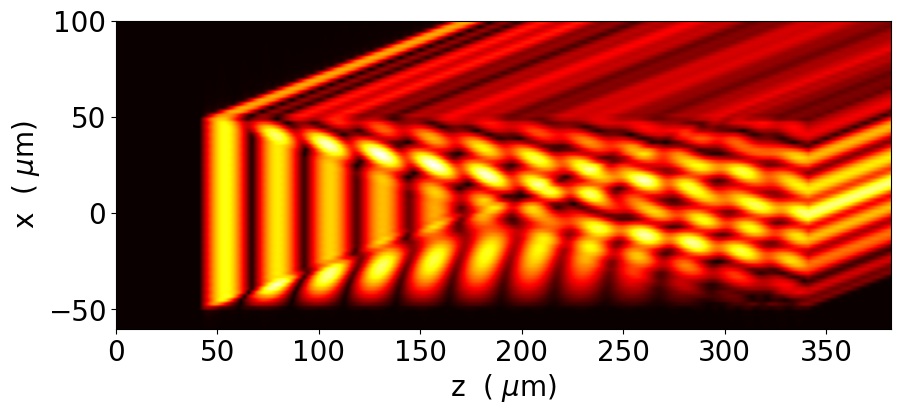

In [8]:
p=1
wM=xcr.M-1
plt.imshow(np.abs(1*U1_xyz[0,:,p,0:wM])**1 + 0*np.abs(U2_xyz[0,:,p,0:wM])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='hot')
plt.ylim(-60,100)
#plt.xlim(0,600)
#plt.imshow(np.abs(U1_xyz[0,:,p,0:wM]*1 + U2_xyz[0,:,p,0:wM]*0), aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')

In [9]:
t1 = time.time()  
print('Time (min):', (t1 - t0)/60)

Time (min): 0.14893747568130494
